## 1. Reading Modules


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from scipy import ndimage, misc
import skimage
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
from google.colab import drive  #mount the code
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/Dog_breed.zip
!unzip /content/drive/MyDrive/cat_breed.zip

Streaming output truncated to the last 5000 lines.
  inflating: cat_breed/Tabby/46213210_51771.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46213210_51771.jpg  
  inflating: cat_breed/Tabby/46051133_9708.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46051133_9708.jpg  
  inflating: cat_breed/Tabby/46613679_10192.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46613679_10192.jpg  
  inflating: cat_breed/Tabby/46436202_31283.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46436202_31283.jpg  
  inflating: cat_breed/Tabby/46142989_57601.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46142989_57601.jpg  
  inflating: cat_breed/Tabby/46607011_11172.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46607011_11172.jpg  
  inflating: cat_breed/Tabby/46621576_8942.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46621576_8942.jpg  
  inflating: cat_breed/Tabby/46120077_8695.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46120077_8695.jpg  
  inflating: cat_breed/Tabby/46225431_50817.jpg  
  inflating: __MA

In [ ]:
filelist  = []

for dirname, _, filenames in os.walk('/content/cat_breed'):
    for filename in filenames:
        filelist.append (os.path.join(dirname, filename))
        


In [ ]:
len(filelist)

54287

In [ ]:
filelist

['/content/cat_breed/.DS_Store',
 '/content/cat_breed/Torbie/41883396_2758.jpg',
 '/content/cat_breed/Torbie/30370179_9165.jpg',
 '/content/cat_breed/Torbie/43712806_1739.jpg',
 '/content/cat_breed/Torbie/34989144_6562.jpg',
 '/content/cat_breed/Torbie/43961798_1604.jpg',
 '/content/cat_breed/Torbie/38335106_4557.jpg',
 '/content/cat_breed/Torbie/31886586_8294.jpg',
 '/content/cat_breed/Torbie/33798592_7213.jpg',
 '/content/cat_breed/Torbie/32820070_7841.jpg',
 '/content/cat_breed/Torbie/39747489_3681.jpg',
 '/content/cat_breed/Torbie/39165122_4098.jpg',
 '/content/cat_breed/Torbie/34299042_6914.jpg',
 '/content/cat_breed/Torbie/45031642_1048.jpg',
 '/content/cat_breed/Torbie/44514620_1364.jpg',
 '/content/cat_breed/Torbie/40062751_3478.jpg',
 '/content/cat_breed/Torbie/38102374_4655.jpg',
 '/content/cat_breed/Torbie/33613268_7346.jpg',
 '/content/cat_breed/Torbie/33105958_7660.jpg',
 '/content/cat_breed/Torbie/30181857_9278.jpg',
 '/content/cat_breed/Torbie/46589513_13602.jpg',
 '/con

### Taking only those 10 labels here.

In [ ]:
labels_needed = ['Bombay', 'Calico', 'Burmese', 'Himalayan',
'Munchkin', 'Ragdoll', 'Siberian', 'British Shorthair', 'Russian Blue', 
                 'Dilute Calico']

In [ ]:
Filepaths   = []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    if label in labels_needed:

        Filepaths.append(image_file)
        labels.append(label)
    


In [ ]:
set(labels)

{'Bombay',
 'British Shorthair',
 'Burmese',
 'Calico',
 'Dilute Calico',
 'Himalayan',
 'Munchkin',
 'Ragdoll',
 'Russian Blue',
 'Siberian'}

In [ ]:
len(Filepaths), len(labels)

(15654, 15654)

### Creating a dataframe with file paths and the labels for them

In [ ]:
df = pd.DataFrame( list( zip (Filepaths, labels) ), columns = ['Filepath', 'Labels'] )
df

,Filepath,Labels
0,/content/cat_breed/Dilute Calico/42042892_2234...,Dilute Calico
1,/content/cat_breed/Dilute Calico/40292882_2935...,Dilute Calico
2,/content/cat_breed/Dilute Calico/45650900_564.jpg,Dilute Calico
3,/content/cat_breed/Dilute Calico/36587821_4757...,Dilute Calico
4,/content/cat_breed/Dilute Calico/34548912_5911...,Dilute Calico
...,...,...
15649,/content/cat_breed/Bombay/33067867_4676.jpg,Bombay
15650,/content/cat_breed/Bombay/22929625_7395.jpg,Bombay
15651,/content/cat_breed/Bombay/19275517_8202.jpg,Bombay
15652,/content/cat_breed/Bombay/20676380_7911.jpg,Bombay


In [ ]:
from sklearn.utils import shuffle
df = (df.sample(frac = 1).reset_index()).drop(columns = 'index')
df


,Filepath,Labels
0,/content/cat_breed/Calico/44980984_6120.jpg,Calico
1,/content/cat_breed/Calico/45919939_3299.jpg,Calico
2,/content/cat_breed/Ragdoll/34722779_3308.jpg,Ragdoll
3,/content/cat_breed/Himalayan/33573483_2704.jpg,Himalayan
4,/content/cat_breed/Bombay/34464064_4209.jpg,Bombay
...,...,...
15649,/content/cat_breed/Dilute Calico/33725677_6390...,Dilute Calico
15650,/content/cat_breed/Russian Blue/42399908_6101.jpg,Russian Blue
15651,/content/cat_breed/Dilute Calico/43957936_1339...,Dilute Calico
15652,/content/cat_breed/Calico/45999138_2687.jpg,Calico


### Displaying first 12 pictures

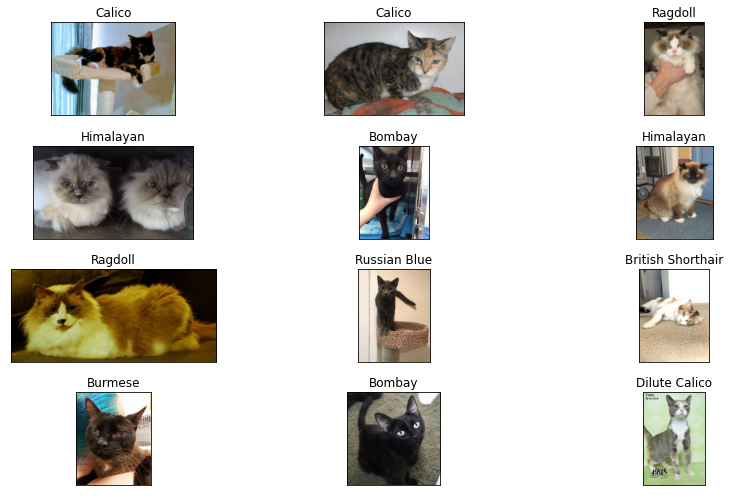

In [ ]:
f,a = plt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Labels[i])
    
plt.tight_layout()
plt.show()

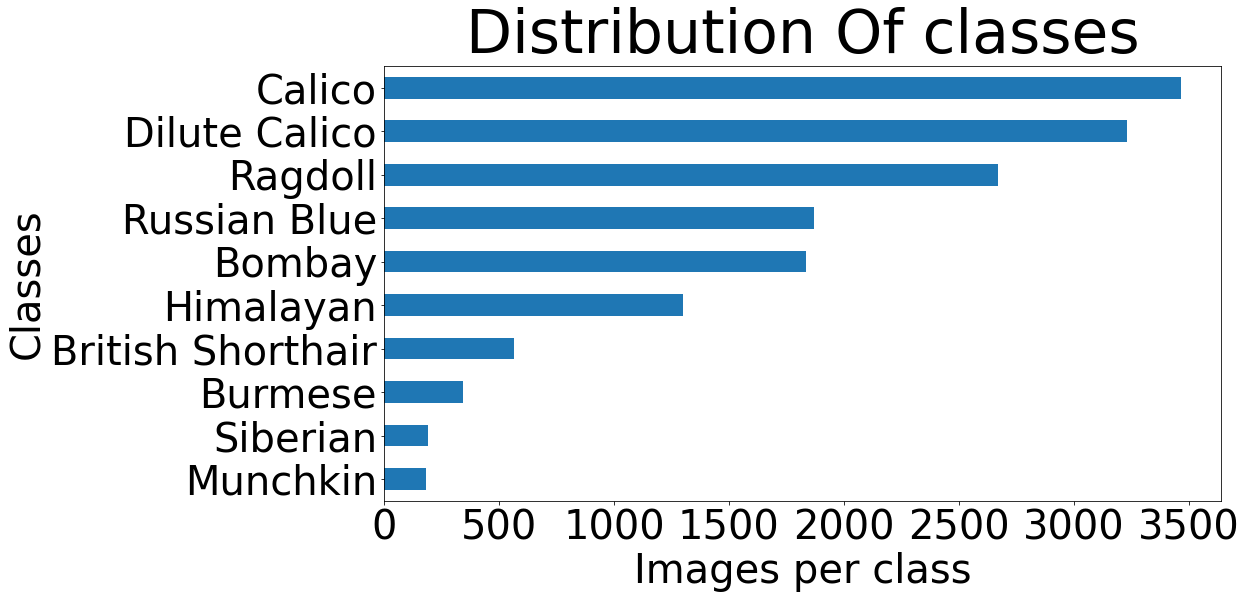

In [ ]:
ax=pd.value_counts(df['Labels'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Distribution Of classes",
                                                       figsize=(15,8))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

### Checking for class imbalance

In [ ]:
df.Labels.value_counts()

Calico               3468
Dilute Calico        3230
Ragdoll              2669
Russian Blue         1870
Bombay               1835
Himalayan            1301
British Shorthair     567
Burmese               344
Siberian              189
Munchkin              181
Name: Labels, dtype: int64

* Class imbalance present.

### Splitting the data And Creating data generator

In [ ]:
train_ratio = .75
validation_ratio = 0.10
test_ratio = 0.25

train, test = train_test_split(df, test_size = test_ratio )
val, test = train_test_split(test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
img_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
   

x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_val = img_datagen.flow_from_dataframe(dataframe = val,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)

Found 11740 validated image filenames belonging to 10 classes.
Found 1118 validated image filenames belonging to 10 classes.
Found 2796 validated image filenames belonging to 10 classes.


In [ ]:
x_train

### Modelling

In [ ]:

i_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(299, 299, 3))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in i_model.layers:
    layer.trainable = False
    
i_model.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
model = Sequential()
model.add(i_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 22,066,346
Trainable params: 263,562
Non-trainable params: 21,802,784
______________________________________

In [ ]:
model.compile(optimizer = SGD(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, validation_data = x_val,steps_per_epoch = 175,validation_steps = 44,
                epochs = 10, verbose = 2)

Epoch 1/10
175/175 - 383s - loss: 1.6435 - accuracy: 0.4286 - val_loss: 1.2493 - val_accuracy: 0.5500 - 383s/epoch - 2s/step
Epoch 2/10
175/175 - 357s - loss: 1.2885 - accuracy: 0.5549 - val_loss: 1.1069 - val_accuracy: 0.5841 - 357s/epoch - 2s/step
Epoch 3/10
175/175 - 361s - loss: 1.1571 - accuracy: 0.5806 - val_loss: 1.0838 - val_accuracy: 0.5773 - 361s/epoch - 2s/step
Epoch 4/10
175/175 - 364s - loss: 1.1529 - accuracy: 0.5806 - val_loss: 1.0385 - val_accuracy: 0.6091 - 364s/epoch - 2s/step
Epoch 5/10
175/175 - 359s - loss: 1.0829 - accuracy: 0.6217 - val_loss: 1.0227 - val_accuracy: 0.6250 - 359s/epoch - 2s/step
Epoch 6/10
175/175 - 358s - loss: 1.0525 - accuracy: 0.6171 - val_loss: 1.0431 - val_accuracy: 0.6432 - 358s/epoch - 2s/step
Epoch 7/10
175/175 - 357s - loss: 1.0245 - accuracy: 0.6554 - val_loss: 0.9806 - val_accuracy: 0.6659 - 357s/epoch - 2s/step
Epoch 8/10
175/175 - 355s - loss: 1.0652 - accuracy: 0.6240 - val_loss: 0.9958 - val_accuracy: 0.6500 - 355s/epoch - 2s/step


# **LOADING THE MODEL AND SAVING THE MODEL**

In [ ]:
from keras.models import model_from_json
model_cat1_json = model.to_json()
with open("/content/drive/MyDrive/model_cat1.json", "w") as json_file:
    json_file.write(model_cat1_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/model_cat1.h5")
print("Saved model to disk")

'''
LOADING THE WEIGHTS OF THE DEEP LEARNING NETWORK
# load json and create model
json_file = open('model_cat.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
'''
 

Saved model to disk


'\nLOADING THE WEIGHTS OF THE DEEP LEARNING NETWORK\n# load json and create model\njson_file = open(\'model_cat.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model.h5")\nprint("Loaded model from disk")\n'

# **LOADING THE HISTORY AND SAVING THE HISTORY**



In [ ]:
#SAVING THE HISTORY

np.save('/content/drive/MyDrive/my_history_cat.npy',history.history)

#Loading the history

#history=np.load('/content/drive/MyDrive/my_history_cat.npy',allow_pickle='TRUE').item()

# **ACCURACY VISUALIZATION**

In [ ]:
import plotly.graph_objects as go
from IPython.display import display, Image
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['accuracy'],
                    name='Train'))

fig.add_trace(go.Scatter(
                    y=history.history['val_accuracy'],
                    name='Valid'))


fig.update_layout(height=450, 
                  width=600,
                  title='Accuracy for Cat breed',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history.history['loss'],
                    name='LOSS'))

fig.add_trace(go.Scatter(
                    y=history.history['val_loss'],
                    name='VAL_LOSS'))


fig.update_layout(height=450, 
                  width=600,
                  title='LOSS for Cat breed',
                  xaxis_title='Epoch',
                  yaxis_title='LOSS')


fig.show()

<Figure size 432x288 with 0 Axes>

### Predicting on test data

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions

array([4, 5, 4, ..., 3, 0, 7])

In [ ]:
labels = x_train.class_indices
labels

{'Bombay': 0,
 'British Shorthair': 1,
 'Burmese': 2,
 'Calico': 3,
 'Dilute Calico': 4,
 'Himalayan': 5,
 'Munchkin': 6,
 'Ragdoll': 7,
 'Russian Blue': 8,
 'Siberian': 9}

In [ ]:
test["Labels"].replace({"Bombay": 0,'British Shorthair': 1,
 'Burmese': 2,
 'Calico': 3,
 'Dilute Calico': 4,
 'Himalayan': 5,
 'Munchkin': 6,
 'Ragdoll': 7,
 'Russian Blue': 8,
 'Siberian': 9}, inplace = True)


## Test Accuracy

In [ ]:
test_accuracy = model.evaluate(x_test)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

280/280 [==============================] - 463s 2s/step - loss: 1.0073 - accuracy: 0.6481
Test accuracy is :  64.80686664581299 %


## Confusion Matrix

In [ ]:
confusion_matrix(test.Labels , predictions)


array([[303,   1,   6,   4,   9,   1,   0,   3,  15,   0],
       [ 11,   3,   0,   9,  42,   0,   0,  30,  13,   0],
       [ 15,   0,  14,   2,   8,   0,   0,  13,   4,   0],
       [ 15,   4,   1, 351, 218,   0,   0,  50,   4,   0],
       [  3,   2,   1,  83, 399,   1,   0,  57,  20,   0],
       [  0,   0,   1,   1,   3,  97,   0, 149,   2,   0],
       [  2,   1,   1,   3,  15,   0,   0,   6,   1,   0],
       [  8,   1,   3,  16,  33,  10,   0, 400,   1,   0],
       [ 13,   0,   6,   0,  43,   0,   0,  15, 220,   0],
       [  4,   0,   0,   3,  11,   0,   0,  12,   0,   0]])

## F1 Score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print('F1 score is',f1_score(test.Labels, predictions, average = 'weighted'))


F1 score is 0.6178575810969349


## ROC - AUC Score

In [ ]:
predicted_probab =model.predict(x_test)
predicted_probab

array([[3.9868183e-03, 2.6753014e-01, 1.2749067e-02, ..., 2.0190440e-02,
        4.5086741e-03, 1.6553763e-02],
       [9.2444435e-04, 3.4274388e-02, 2.3710809e-03, ..., 1.9086438e-01,
        1.2872503e-03, 6.6570804e-02],
       [6.5958053e-02, 1.3444439e-01, 3.4579355e-02, ..., 3.7306547e-02,
        1.0383416e-01, 2.0865787e-02],
       ...,
       [1.5479635e-03, 6.6954084e-03, 3.1481825e-03, ..., 1.3301645e-02,
        2.6638896e-04, 1.4543179e-03],
       [8.9777088e-01, 3.7130795e-02, 1.5807021e-02, ..., 8.7004021e-04,
        2.6739795e-02, 1.7952145e-03],
       [7.6420404e-02, 2.2296445e-02, 3.1342469e-02, ..., 7.1871471e-01,
        1.8828368e-02, 4.4360660e-02]], dtype=float32)

In [ ]:
print("ROC- AUC score is", roc_auc_score( test.Labels, predicted_probab, multi_class='ovr'))

ROC- AUC score is 0.8899118696374797
